<a href="https://colab.research.google.com/github/RenanLevenhagen/titanic/blob/master/Titanic_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iniciando : importar as libs


In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

# Importando o banco de dados

## Baixe o arquivo do dataset Titanic no link:

https://github.com/RenanLevenhagen/titanic

inclua o arquivo baixado na pasta de execução do código.

In [0]:
df= pd.read_csv('titanic.csv')


In [0]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [0]:
df.shape

(887, 8)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


# Features: o que são?

#### São as variáveis que serão analisadas pelo algoritmo escolhido, onde será encontrado um padrão.
#### Devemos manter essas features, no nosso caso, com valores numéricos.


### Atenção: Feature 'SEX' é categórica, como transformar em numérica?  

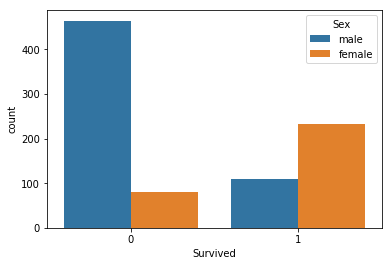

In [0]:
sns.countplot(x='Survived', hue='Sex', data= df)

In [0]:
col_sex = {'Sex':{'male':0,'female':1}}
df.replace(col_sex, inplace=True)


In [0]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


# Features vazias: pode isso?

#### Como devemos fazer antes de treinar nosso modelo, temos que tratar nossos dados, vericar possíveis outliers, dados null ou mesmo erros dentro do nosso dataset. Neste caso, temos um dataset preparado para ser executado o treinamento, mas no mundo real nunca iremos ter essa facilidade.

#### Para saber se temos alguma feature com valores faltantes(null), temos que executar o código abaixo:


In [0]:
df.isnull().sum()


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

# Bora explorar os dados um pouco mais?
#### Grande parte do tempo que gastamos para executar machine learning é tratando e explorando nossos dados. Temos que ter intimidade com o dataset se queremos retirar insights dele, portanto vamos ver como as features se relacionam.

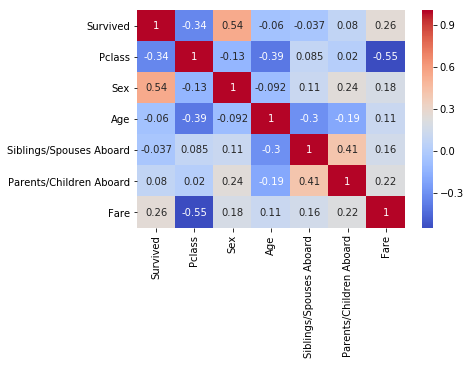

In [0]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

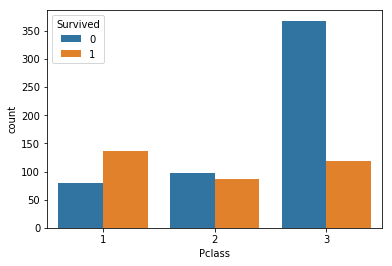

In [0]:
sns.countplot(x='Pclass',hue='Survived', data=df)

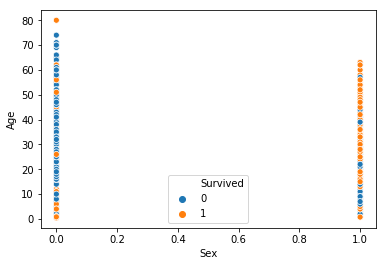

In [0]:

sns.scatterplot(x='Sex',y='Age',hue='Survived', data=df)

# Vamos começar a treinar: Separando nosso dataset
#### Para que o algoritmo consiga ter um bom resultado, nossos dados precisam ser confiáveis, integros e ser divido em duas partes: TREINO e TESTE.

#### Não existe uma proporção exata e fixa, depende do tamanho do dataset para realizar essa separação. Iremos usar 70/30, 70 pra treino e 30 para teste.

X= Features do nosso modelo
Y= Label (Target) 

In [0]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Name','Survived'],axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [0]:
X_train

# Treinando o modelo e criando nossa predição

#### Esse passo é o mais fácil, pois o algoritmo realiza sem que tenhamos que fazer calculos ou códigos complexos 

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
predictions

In [0]:
final = pd.DataFrame(X_test)
final['pred'] = predictions

In [0]:
final.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,pred
636,3,0,37.0,1,0,16.1000,0
886,3,0,32.0,0,0,7.7500,0
174,3,0,18.0,1,1,7.8542,0
841,3,0,42.0,0,0,7.5500,0
438,3,0,20.0,0,0,9.5000,0


# Analisando a performance do nosso modelo
#### Acabamos de criar, treinar e fazer a primeira predição com nosso modelo.
#### Podemos ver como ele se saiu, usando a própria lib do sklearn.

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       159
           1       0.76      0.66      0.71       108

    accuracy                           0.78       267
   macro avg       0.78      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267



# Exemplo: Inserindo dados para serem processados pelo algoritmo
#### Vamos agora colocar um exemplo de dados de uma pessoa, para que o algoritmo nos diga se essa pessoa sobreviveria ou não, pelo padrão encontrado por ele.

In [0]:
predictions = logmodel.predict([[3,1,40,1,1,7500]])

In [0]:
predictions

array([1])